In [80]:
#import all the required libraries

import random
import tensorflow as tf
import numpy as np
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.datasets import cifar100
from keras.models import Sequential,Model
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Flatten , Dense, Activation,Dropout

In [81]:
#Load the cifar10 data and normalize the pixels for training

(X_train_cifar10,y_train_cifar10),(X_test_cifar10,y_test_cifar10)=cifar10.load_data()
# Transform label indices to one-hot encoded vectors
y_train_cifar10 = to_categorical(y_train_cifar10, num_classes=10)
y_test_cifar10 = to_categorical(y_test_cifar10, num_classes=10)

# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)

X_train_cifar10 = np.reshape(X_train_cifar10,(50000,32,32,3))
X_test_cifar10 = np.reshape(X_test_cifar10,(10000,32,32,3))
X_train_cifar10 = X_train_cifar10.astype('float32')
X_test_cifar10 = X_test_cifar10.astype('float32')

# Normalization of pixel values (to [0-1] range)

X_train_cifar10 /= 255
X_test_cifar10 /= 255

In [82]:
#Load the cifar100 data and normalize the pixels for training

(X_train_cifar100,y_train_cifar100),(X_test_cifar100,y_test_cifar100)=cifar100.load_data()
# Transform label indices to one-hot encoded vectors
y_train_cifar100 = to_categorical(y_train_cifar100, num_classes=100)
y_test_cifar100 = to_categorical(y_test_cifar100, num_classes=100)

# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)

X_train_cifar100 = np.reshape(X_train_cifar100,(50000,32,32,3))
X_test_cifar100 = np.reshape(X_test_cifar100,(10000,32,32,3))
X_train_cifar100 = X_train_cifar100.astype('float32')
X_test_cifar100 = X_test_cifar100.astype('float32')

# Normalization of pixel values (to [0-1] range)

X_train_cifar100 /= 255
X_test_cifar100 /= 255

In [83]:
random_indices=random.sample(range(len(X_train_cifar100)),1000)
X_train_cifar100_r=X_train_cifar100[random_indices]
y_train_cifar100_r=y_train_cifar100[random_indices]
random_indices_test=random.sample(range(len(X_test_cifar100)),1000)
X_test_cifar100_r=X_test_cifar100[random_indices_test]
y_test_cifar100_r=y_test_cifar100[random_indices_test]

In [84]:
def model_train_CNN_cifar10():
    model_cifar10 = Sequential()
    model_cifar10.add(Conv2D(17, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model_cifar10.add(MaxPooling2D((2, 2)))
    model_cifar10.add(Flatten())
    model_cifar10.add(Dense(5, activation='relu'))
    model_cifar10.add(Dropout(0.025))
    model_cifar10.add(Dense(10,activation='softmax'))
    return model_cifar10

def plotting_graph(history):
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='CNN1_train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='CNN1_test')

def plotting_verify(history1,history2,history3,history4):
    pyplot.plot(history1.history['val_accuracy'], color='orange', label='CNN_baseline')
    pyplot.plot(history2.history['val_accuracy'], color='green', label='CNN_transfer')
    pyplot.plot(history3.history['val_accuracy'], color='red', label='CNN_freeze')
    pyplot.plot(history4.history['val_accuracy'], color='blue', label='CNN_finetuning')
    pyplot.legend()

def model_train_CNN_cifar100():
    model_cifar10 = Sequential()
    model_cifar10.add(Conv2D(17, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model_cifar10.add(MaxPooling2D((2, 2)))
    model_cifar10.add(Flatten())
    model_cifar10.add(Dense(5, activation='relu'))
    model_cifar10.add(Dropout(0.015))
    model_cifar10.add(Dense(100, activation='softmax'))
    return model_cifar10

def model_train_CNN_finetuning():
    layer1=(Conv2D(17, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    layer2=(MaxPooling2D((2, 2)))
    layer3=(Flatten())
    layer4=(Dense(5, activation='relu'))
    layer5=(Dropout(0.025))
    layer6=(Dense(10,activation='softmax'))
    model_cifar10 = Sequential([layer1,layer2,layer3,layer4,layer5,layer6])
    return model_cifar10,layer1,layer2


In [85]:
#First CNN for CIFAR10 dataset
model_CNN1=model_train_CNN_cifar10()
model_CNN1.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 30, 30, 17)        476       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 15, 15, 17)        0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 3825)              0         
_________________________________________________________________
dense_57 (Dense)             (None, 5)                 19130     
_________________________________________________________________
dropout_24 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_58 (Dense)             (None, 10)                60        
Total params: 19,666
Trainable params: 19,666
Non-trainable params: 0
_________________________________________________

In [86]:
#Training the CNN1 model for 500 epochs

model_CNN1.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
history_CNN1=model_CNN1.fit(X_train_cifar10,y_train_cifar10, epochs=100, batch_size=512, validation_data=(X_test_cifar10,y_test_cifar10),verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 8s 153us/step - loss: 2.2601 - accuracy: 0.1308 - val_loss: 2.2000 - val_accuracy: 0.1814
Epoch 2/100
50000/50000 [==============================] - 8s 153us/step - loss: 2.1334 - accuracy: 0.2065 - val_loss: 2.0554 - val_accuracy: 0.2677
Epoch 3/100
50000/50000 [==============================] - 8s 162us/step - loss: 1.9950 - accuracy: 0.2733 - val_loss: 1.9235 - val_accuracy: 0.3011
Epoch 4/100
50000/50000 [==============================] - 8s 160us/step - loss: 1.8940 - accuracy: 0.2905 - val_loss: 1.8395 - val_accuracy: 0.3102
Epoch 5/100
50000/50000 [==============================] - 8s 160us/step - loss: 1.8260 - accuracy: 0.3031 - val_loss: 1.7957 - val_accuracy: 0.3113
Epoch 6/100
50000/50000 [==============================] - 8s 161us/step - loss: 1.7930 - accuracy: 0.3073 - val_loss: 1.7642 - val_accuracy: 0.3263
Epoch 7/100
50000/50000 [==============================]

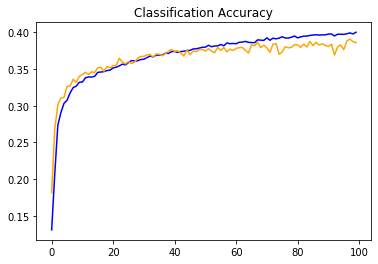

In [87]:
#plotting the graph between the training and validation accuracy and saving the weights at a aprticular check point
#for future use.

plotting_graph(history_CNN1)
model_CNN1.save_weights('./Documents')

CNN1 complete less than 20000 parameters

In [88]:
model_CNN2=model_train_CNN_cifar100()
model_CNN2.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 30, 30, 17)        476       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 15, 15, 17)        0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 3825)              0         
_________________________________________________________________
dense_59 (Dense)             (None, 5)                 19130     
_________________________________________________________________
dropout_25 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_60 (Dense)             (None, 100)               600       
Total params: 20,206
Trainable params: 20,206
Non-trainable params: 0
_________________________________________________

In [89]:
#Training the CNN2 models with 2% of the training dataset and 2% validation data accordingly for 500 epochs

model_CNN2.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
history_CNN2=model_CNN2.fit(X_train_cifar100_r,y_train_cifar100_r, epochs=500, batch_size=10, validation_data=(X_test_cifar100_r,y_test_cifar100_r),verbose=1)


Train on 1000 samples, validate on 1000 samples
Epoch 1/500
1000/1000 [==============================] - 1s 878us/step - loss: 4.6099 - accuracy: 0.0120 - val_loss: 4.6056 - val_accuracy: 0.0110
Epoch 2/500
1000/1000 [==============================] - 1s 581us/step - loss: 4.6018 - accuracy: 0.0160 - val_loss: 4.6045 - val_accuracy: 0.0060
Epoch 3/500
1000/1000 [==============================] - 1s 583us/step - loss: 4.5967 - accuracy: 0.0120 - val_loss: 4.6002 - val_accuracy: 0.0100
Epoch 4/500
1000/1000 [==============================] - 1s 572us/step - loss: 4.5861 - accuracy: 0.0210 - val_loss: 4.5985 - val_accuracy: 0.0140
Epoch 5/500
1000/1000 [==============================] - 1s 582us/step - loss: 4.5697 - accuracy: 0.0180 - val_loss: 4.5921 - val_accuracy: 0.0180
Epoch 6/500
1000/1000 [==============================] - 1s 605us/step - loss: 4.5362 - accuracy: 0.0260 - val_loss: 4.5753 - val_accuracy: 0.0150
Epoch 7/500
1000/1000 [==============================] - 1s 608us/step

1000/1000 [==============================] - 1s 597us/step - loss: 3.3246 - accuracy: 0.1150 - val_loss: 7.1067 - val_accuracy: 0.0220
Epoch 112/500
1000/1000 [==============================] - 1s 600us/step - loss: 3.3181 - accuracy: 0.1250 - val_loss: 7.0639 - val_accuracy: 0.0220
Epoch 113/500
1000/1000 [==============================] - 1s 598us/step - loss: 3.3349 - accuracy: 0.1220 - val_loss: 6.9674 - val_accuracy: 0.0190
Epoch 114/500
1000/1000 [==============================] - 1s 605us/step - loss: 3.3069 - accuracy: 0.1150 - val_loss: 6.9154 - val_accuracy: 0.0230
Epoch 115/500
1000/1000 [==============================] - 1s 608us/step - loss: 3.3211 - accuracy: 0.1210 - val_loss: 7.3380 - val_accuracy: 0.0230
Epoch 116/500
1000/1000 [==============================] - 1s 569us/step - loss: 3.3137 - accuracy: 0.1270 - val_loss: 7.3832 - val_accuracy: 0.0260
Epoch 117/500
1000/1000 [==============================] - 1s 595us/step - loss: 3.2865 - accuracy: 0.1250 - val_loss: 7

1000/1000 [==============================] - 1s 601us/step - loss: 3.1472 - accuracy: 0.1480 - val_loss: 10.0998 - val_accuracy: 0.0160
Epoch 167/500
1000/1000 [==============================] - 1s 594us/step - loss: 3.1453 - accuracy: 0.1530 - val_loss: 9.2237 - val_accuracy: 0.0170
Epoch 168/500
1000/1000 [==============================] - 1s 595us/step - loss: 3.0919 - accuracy: 0.1590 - val_loss: 9.4104 - val_accuracy: 0.0200
Epoch 169/500
1000/1000 [==============================] - 1s 600us/step - loss: 3.1024 - accuracy: 0.1660 - val_loss: 9.7762 - val_accuracy: 0.0190
Epoch 170/500
1000/1000 [==============================] - 1s 603us/step - loss: 3.2090 - accuracy: 0.1430 - val_loss: 9.8469 - val_accuracy: 0.0200
Epoch 171/500
1000/1000 [==============================] - 1s 610us/step - loss: 3.1379 - accuracy: 0.1420 - val_loss: 9.4719 - val_accuracy: 0.0200
Epoch 172/500
1000/1000 [==============================] - 1s 597us/step - loss: 3.1307 - accuracy: 0.1670 - val_loss: 

Epoch 221/500
1000/1000 [==============================] - 1s 600us/step - loss: 2.9998 - accuracy: 0.1760 - val_loss: 12.2785 - val_accuracy: 0.0250
Epoch 222/500
1000/1000 [==============================] - 1s 599us/step - loss: 3.0174 - accuracy: 0.1970 - val_loss: 11.7088 - val_accuracy: 0.0260
Epoch 223/500
1000/1000 [==============================] - 1s 598us/step - loss: 2.9723 - accuracy: 0.1940 - val_loss: 12.5049 - val_accuracy: 0.0240
Epoch 224/500
1000/1000 [==============================] - 1s 604us/step - loss: 3.0089 - accuracy: 0.1770 - val_loss: 12.1482 - val_accuracy: 0.0260
Epoch 225/500
1000/1000 [==============================] - 1s 596us/step - loss: 3.0065 - accuracy: 0.1760 - val_loss: 12.0964 - val_accuracy: 0.0240
Epoch 226/500
1000/1000 [==============================] - 1s 605us/step - loss: 3.0037 - accuracy: 0.1830 - val_loss: 12.0178 - val_accuracy: 0.0220
Epoch 227/500
1000/1000 [==============================] - 1s 603us/step - loss: 3.0097 - accuracy: 

Epoch 330/500
1000/1000 [==============================] - 1s 625us/step - loss: 2.8973 - accuracy: 0.2180 - val_loss: 17.0350 - val_accuracy: 0.0220
Epoch 331/500
1000/1000 [==============================] - 1s 597us/step - loss: 2.8237 - accuracy: 0.2210 - val_loss: 17.9867 - val_accuracy: 0.0250
Epoch 332/500
1000/1000 [==============================] - 1s 602us/step - loss: 2.9055 - accuracy: 0.2130 - val_loss: 16.8447 - val_accuracy: 0.0290
Epoch 333/500
1000/1000 [==============================] - 1s 601us/step - loss: 2.9948 - accuracy: 0.2000 - val_loss: 17.6027 - val_accuracy: 0.0240
Epoch 334/500
1000/1000 [==============================] - 1s 600us/step - loss: 2.8574 - accuracy: 0.2230 - val_loss: 17.8198 - val_accuracy: 0.0240
Epoch 335/500
1000/1000 [==============================] - 1s 594us/step - loss: 2.8627 - accuracy: 0.1960 - val_loss: 17.8921 - val_accuracy: 0.0220
Epoch 336/500
1000/1000 [==============================] - 1s 606us/step - loss: 2.8323 - accuracy: 

Epoch 439/500
1000/1000 [==============================] - 1s 605us/step - loss: 2.8229 - accuracy: 0.2160 - val_loss: 22.1709 - val_accuracy: 0.0210
Epoch 440/500
1000/1000 [==============================] - 1s 598us/step - loss: 2.7500 - accuracy: 0.2500 - val_loss: 22.0682 - val_accuracy: 0.0190
Epoch 441/500
1000/1000 [==============================] - 1s 603us/step - loss: 2.7189 - accuracy: 0.2340 - val_loss: 22.3071 - val_accuracy: 0.0170
Epoch 442/500
1000/1000 [==============================] - 1s 596us/step - loss: 2.8011 - accuracy: 0.2310 - val_loss: 23.6827 - val_accuracy: 0.0210
Epoch 443/500
1000/1000 [==============================] - 1s 599us/step - loss: 2.7404 - accuracy: 0.2270 - val_loss: 23.5883 - val_accuracy: 0.0180
Epoch 444/500
1000/1000 [==============================] - 1s 607us/step - loss: 2.8088 - accuracy: 0.2270 - val_loss: 23.7953 - val_accuracy: 0.0220
Epoch 445/500
1000/1000 [==============================] - 1s 602us/step - loss: 2.7681 - accuracy: 

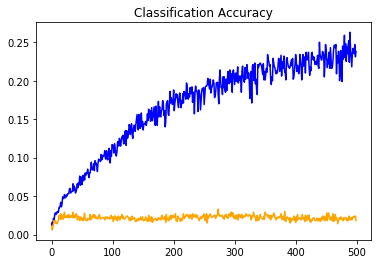

In [90]:
plotting_graph(history_CNN2)

CNN2 complete

In [91]:
#Third CNN using transfer learning from CIFAR10 by loading the weights saved previously from CIFAR10

base_model=model_train_CNN_cifar10()
base_model.load_weights('./Documents')
model_CNN3=Sequential([base_model,Dense(100,activation='softmax')])
model_CNN3.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_36 (Sequential)   (None, 10)                19666     
_________________________________________________________________
dense_63 (Dense)             (None, 100)               1100      
Total params: 20,766
Trainable params: 20,766
Non-trainable params: 0
_________________________________________________________________


In [92]:
#Training the third CNN model for 500 epochs

model_CNN3.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
history_CNN3=model_CNN3.fit(X_train_cifar100_r,y_train_cifar100_r, epochs=500, batch_size=10,validation_data=(X_test_cifar100_r,y_test_cifar100_r), verbose=1)

Train on 1000 samples, validate on 1000 samples
Epoch 1/500
1000/1000 [==============================] - 1s 883us/step - loss: 4.6059 - accuracy: 0.0080 - val_loss: 4.6059 - val_accuracy: 0.0090
Epoch 2/500
1000/1000 [==============================] - 1s 580us/step - loss: 4.5916 - accuracy: 0.0110 - val_loss: 4.5995 - val_accuracy: 0.0100
Epoch 3/500
1000/1000 [==============================] - 1s 575us/step - loss: 4.5787 - accuracy: 0.0140 - val_loss: 4.5957 - val_accuracy: 0.0120
Epoch 4/500
1000/1000 [==============================] - 1s 574us/step - loss: 4.5644 - accuracy: 0.0180 - val_loss: 4.5909 - val_accuracy: 0.0130
Epoch 5/500
1000/1000 [==============================] - 1s 572us/step - loss: 4.5516 - accuracy: 0.0190 - val_loss: 4.5815 - val_accuracy: 0.0180
Epoch 6/500
1000/1000 [==============================] - 1s 574us/step - loss: 4.5365 - accuracy: 0.0280 - val_loss: 4.5779 - val_accuracy: 0.0180
Epoch 7/500
1000/1000 [==============================] - 1s 567us/step

1000/1000 [==============================] - 1s 578us/step - loss: 3.4581 - accuracy: 0.0970 - val_loss: 5.0152 - val_accuracy: 0.0160
Epoch 112/500
1000/1000 [==============================] - 1s 567us/step - loss: 3.4411 - accuracy: 0.1060 - val_loss: 4.9977 - val_accuracy: 0.0140
Epoch 113/500
1000/1000 [==============================] - 1s 569us/step - loss: 3.4508 - accuracy: 0.0970 - val_loss: 5.0478 - val_accuracy: 0.0200
Epoch 114/500
1000/1000 [==============================] - 1s 565us/step - loss: 3.4190 - accuracy: 0.0990 - val_loss: 5.0516 - val_accuracy: 0.0170
Epoch 115/500
1000/1000 [==============================] - 1s 573us/step - loss: 3.4541 - accuracy: 0.0870 - val_loss: 5.0829 - val_accuracy: 0.0190
Epoch 116/500
1000/1000 [==============================] - 1s 570us/step - loss: 3.4344 - accuracy: 0.0980 - val_loss: 5.0674 - val_accuracy: 0.0210
Epoch 117/500
1000/1000 [==============================] - 1s 566us/step - loss: 3.4399 - accuracy: 0.1000 - val_loss: 5

1000/1000 [==============================] - 1s 571us/step - loss: 3.2842 - accuracy: 0.1320 - val_loss: 5.5058 - val_accuracy: 0.0190
Epoch 167/500
1000/1000 [==============================] - 1s 577us/step - loss: 3.2496 - accuracy: 0.1410 - val_loss: 5.5427 - val_accuracy: 0.0160
Epoch 168/500
1000/1000 [==============================] - 1s 575us/step - loss: 3.2647 - accuracy: 0.1320 - val_loss: 5.5227 - val_accuracy: 0.0170
Epoch 169/500
1000/1000 [==============================] - 1s 574us/step - loss: 3.2774 - accuracy: 0.1320 - val_loss: 5.5374 - val_accuracy: 0.0180
Epoch 170/500
1000/1000 [==============================] - 1s 570us/step - loss: 3.2643 - accuracy: 0.1380 - val_loss: 5.5546 - val_accuracy: 0.0190
Epoch 171/500
1000/1000 [==============================] - 1s 567us/step - loss: 3.2931 - accuracy: 0.1340 - val_loss: 5.5763 - val_accuracy: 0.0180
Epoch 172/500
1000/1000 [==============================] - 1s 595us/step - loss: 3.2681 - accuracy: 0.1220 - val_loss: 5

1000/1000 [==============================] - 1s 562us/step - loss: 3.1628 - accuracy: 0.1630 - val_loss: 5.9494 - val_accuracy: 0.0170
Epoch 222/500
1000/1000 [==============================] - 1s 569us/step - loss: 3.1320 - accuracy: 0.1540 - val_loss: 5.9893 - val_accuracy: 0.0180
Epoch 223/500
1000/1000 [==============================] - 1s 567us/step - loss: 3.1377 - accuracy: 0.1750 - val_loss: 6.0255 - val_accuracy: 0.0210
Epoch 224/500
1000/1000 [==============================] - 1s 570us/step - loss: 3.1444 - accuracy: 0.1670 - val_loss: 6.0182 - val_accuracy: 0.0210
Epoch 225/500
1000/1000 [==============================] - 1s 566us/step - loss: 3.1316 - accuracy: 0.1610 - val_loss: 6.0288 - val_accuracy: 0.0160
Epoch 226/500
1000/1000 [==============================] - 1s 591us/step - loss: 3.1164 - accuracy: 0.1700 - val_loss: 6.0075 - val_accuracy: 0.0240
Epoch 227/500
1000/1000 [==============================] - 1s 571us/step - loss: 3.1108 - accuracy: 0.1650 - val_loss: 5

1000/1000 [==============================] - 1s 567us/step - loss: 3.0490 - accuracy: 0.2020 - val_loss: 6.3419 - val_accuracy: 0.0230
Epoch 277/500
1000/1000 [==============================] - 1s 569us/step - loss: 3.0143 - accuracy: 0.1930 - val_loss: 6.4007 - val_accuracy: 0.0230
Epoch 278/500
1000/1000 [==============================] - 1s 565us/step - loss: 3.0313 - accuracy: 0.1860 - val_loss: 6.3814 - val_accuracy: 0.0190
Epoch 279/500
1000/1000 [==============================] - 1s 596us/step - loss: 3.0668 - accuracy: 0.1930 - val_loss: 6.3338 - val_accuracy: 0.0210
Epoch 280/500
1000/1000 [==============================] - 1s 566us/step - loss: 3.0090 - accuracy: 0.1940 - val_loss: 6.3652 - val_accuracy: 0.0230
Epoch 281/500
1000/1000 [==============================] - 1s 572us/step - loss: 3.0388 - accuracy: 0.1890 - val_loss: 6.4059 - val_accuracy: 0.0190
Epoch 282/500
1000/1000 [==============================] - 1s 570us/step - loss: 2.9855 - accuracy: 0.1940 - val_loss: 6

1000/1000 [==============================] - 1s 570us/step - loss: 2.8827 - accuracy: 0.2200 - val_loss: 6.7245 - val_accuracy: 0.0240
Epoch 332/500
1000/1000 [==============================] - 1s 577us/step - loss: 2.9513 - accuracy: 0.2080 - val_loss: 6.6967 - val_accuracy: 0.0250
Epoch 333/500
1000/1000 [==============================] - 1s 592us/step - loss: 2.9062 - accuracy: 0.2260 - val_loss: 6.7522 - val_accuracy: 0.0270
Epoch 334/500
1000/1000 [==============================] - 1s 572us/step - loss: 2.8765 - accuracy: 0.2260 - val_loss: 6.7454 - val_accuracy: 0.0250
Epoch 335/500
1000/1000 [==============================] - 1s 576us/step - loss: 2.9637 - accuracy: 0.2080 - val_loss: 6.7828 - val_accuracy: 0.0240
Epoch 336/500
1000/1000 [==============================] - 1s 575us/step - loss: 2.8960 - accuracy: 0.2140 - val_loss: 6.7979 - val_accuracy: 0.0260
Epoch 337/500
1000/1000 [==============================] - 1s 573us/step - loss: 2.9071 - accuracy: 0.2390 - val_loss: 6

1000/1000 [==============================] - 1s 583us/step - loss: 2.7361 - accuracy: 0.2650 - val_loss: 7.4569 - val_accuracy: 0.0310
Epoch 441/500
1000/1000 [==============================] - 1s 578us/step - loss: 2.7287 - accuracy: 0.2510 - val_loss: 7.4350 - val_accuracy: 0.0260
Epoch 442/500
1000/1000 [==============================] - 1s 567us/step - loss: 2.7958 - accuracy: 0.2390 - val_loss: 7.4732 - val_accuracy: 0.0270
Epoch 443/500
1000/1000 [==============================] - 1s 578us/step - loss: 2.7002 - accuracy: 0.2460 - val_loss: 7.4456 - val_accuracy: 0.0250
Epoch 444/500
1000/1000 [==============================] - 1s 561us/step - loss: 2.7129 - accuracy: 0.2680 - val_loss: 7.4028 - val_accuracy: 0.0270
Epoch 445/500
1000/1000 [==============================] - 1s 572us/step - loss: 2.7269 - accuracy: 0.2650 - val_loss: 7.4545 - val_accuracy: 0.0220
Epoch 446/500
1000/1000 [==============================] - 1s 568us/step - loss: 2.7383 - accuracy: 0.2580 - val_loss: 7

1000/1000 [==============================] - 1s 573us/step - loss: 2.6334 - accuracy: 0.2790 - val_loss: 7.8301 - val_accuracy: 0.0210
Epoch 496/500
1000/1000 [==============================] - 1s 572us/step - loss: 2.6724 - accuracy: 0.2730 - val_loss: 7.8723 - val_accuracy: 0.0260
Epoch 497/500
1000/1000 [==============================] - 1s 567us/step - loss: 2.6845 - accuracy: 0.2520 - val_loss: 7.8077 - val_accuracy: 0.0240
Epoch 498/500
1000/1000 [==============================] - 1s 573us/step - loss: 2.7372 - accuracy: 0.2400 - val_loss: 7.7683 - val_accuracy: 0.0190
Epoch 499/500
1000/1000 [==============================] - 1s 570us/step - loss: 2.6763 - accuracy: 0.2370 - val_loss: 7.7825 - val_accuracy: 0.0220
Epoch 500/500
1000/1000 [==============================] - 1s 568us/step - loss: 2.6675 - accuracy: 0.2540 - val_loss: 7.8243 - val_accuracy: 0.0280


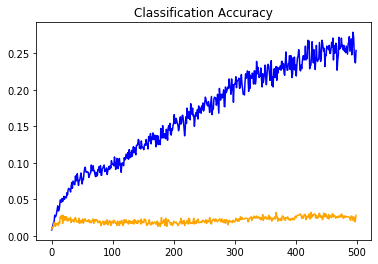

In [93]:
plotting_graph(history_CNN3)

CNN3 complete

In [94]:
#Fourth CNN using transfer learning(freezing the transferred layer i.e the loaded weights) from CIFAR10

base_model=model_train_CNN_cifar10()
base_model.load_weights('./Documents')
base_model.trainable=False
model_CNN4=Sequential([base_model,Dense(100,activation='softmax')])
model_CNN4.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_38 (Sequential)   (None, 10)                19666     
_________________________________________________________________
dense_66 (Dense)             (None, 100)               1100      
Total params: 20,766
Trainable params: 1,100
Non-trainable params: 19,666
_________________________________________________________________


In [95]:
#Training the fourth CNN model for 500 epochs

model_CNN4.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
history_CNN4=model_CNN4.fit(X_train_cifar100_r,y_train_cifar100_r, epochs=500, batch_size=10,validation_data=(X_test_cifar100_r,y_test_cifar100_r), verbose=1)

Train on 1000 samples, validate on 1000 samples
Epoch 1/500
1000/1000 [==============================] - 1s 691us/step - loss: 4.6066 - accuracy: 0.0110 - val_loss: 4.6045 - val_accuracy: 0.0090
Epoch 2/500
1000/1000 [==============================] - 0s 414us/step - loss: 4.5902 - accuracy: 0.0190 - val_loss: 4.5979 - val_accuracy: 0.0130
Epoch 3/500
1000/1000 [==============================] - 0s 386us/step - loss: 4.5775 - accuracy: 0.0220 - val_loss: 4.5917 - val_accuracy: 0.0150
Epoch 4/500
1000/1000 [==============================] - 0s 440us/step - loss: 4.5656 - accuracy: 0.0230 - val_loss: 4.5859 - val_accuracy: 0.0150
Epoch 5/500
1000/1000 [==============================] - 0s 395us/step - loss: 4.5532 - accuracy: 0.0240 - val_loss: 4.5807 - val_accuracy: 0.0150
Epoch 6/500
1000/1000 [==============================] - 0s 381us/step - loss: 4.5420 - accuracy: 0.0260 - val_loss: 4.5760 - val_accuracy: 0.0150
Epoch 7/500
1000/1000 [==============================] - 0s 368us/step

1000/1000 [==============================] - 0s 378us/step - loss: 4.2128 - accuracy: 0.0510 - val_loss: 4.4523 - val_accuracy: 0.0270
Epoch 112/500
1000/1000 [==============================] - 0s 359us/step - loss: 4.2121 - accuracy: 0.0520 - val_loss: 4.4524 - val_accuracy: 0.0280
Epoch 113/500
1000/1000 [==============================] - 0s 370us/step - loss: 4.2099 - accuracy: 0.0540 - val_loss: 4.4522 - val_accuracy: 0.0270
Epoch 114/500
1000/1000 [==============================] - 0s 383us/step - loss: 4.2163 - accuracy: 0.0530 - val_loss: 4.4520 - val_accuracy: 0.0270
Epoch 115/500
1000/1000 [==============================] - 0s 381us/step - loss: 4.2091 - accuracy: 0.0480 - val_loss: 4.4521 - val_accuracy: 0.0280
Epoch 116/500
1000/1000 [==============================] - 0s 377us/step - loss: 4.2117 - accuracy: 0.0500 - val_loss: 4.4519 - val_accuracy: 0.0270
Epoch 117/500
1000/1000 [==============================] - 0s 374us/step - loss: 4.2129 - accuracy: 0.0520 - val_loss: 4

1000/1000 [==============================] - 0s 367us/step - loss: 4.1804 - accuracy: 0.0500 - val_loss: 4.4537 - val_accuracy: 0.0260
Epoch 167/500
1000/1000 [==============================] - 0s 370us/step - loss: 4.1734 - accuracy: 0.0480 - val_loss: 4.4536 - val_accuracy: 0.0270
Epoch 168/500
1000/1000 [==============================] - 0s 373us/step - loss: 4.1834 - accuracy: 0.0510 - val_loss: 4.4540 - val_accuracy: 0.0260
Epoch 169/500
1000/1000 [==============================] - 0s 372us/step - loss: 4.1728 - accuracy: 0.0490 - val_loss: 4.4538 - val_accuracy: 0.0250
Epoch 170/500
1000/1000 [==============================] - 0s 383us/step - loss: 4.1799 - accuracy: 0.0460 - val_loss: 4.4540 - val_accuracy: 0.0250
Epoch 171/500
1000/1000 [==============================] - 0s 370us/step - loss: 4.1689 - accuracy: 0.0510 - val_loss: 4.4539 - val_accuracy: 0.0250
Epoch 172/500
1000/1000 [==============================] - 0s 379us/step - loss: 4.1760 - accuracy: 0.0500 - val_loss: 4

1000/1000 [==============================] - 0s 381us/step - loss: 4.1736 - accuracy: 0.0500 - val_loss: 4.4599 - val_accuracy: 0.0260
Epoch 222/500
1000/1000 [==============================] - 0s 371us/step - loss: 4.1679 - accuracy: 0.0500 - val_loss: 4.4600 - val_accuracy: 0.0270
Epoch 223/500
1000/1000 [==============================] - 0s 380us/step - loss: 4.1515 - accuracy: 0.0540 - val_loss: 4.4605 - val_accuracy: 0.0260
Epoch 224/500
1000/1000 [==============================] - 0s 374us/step - loss: 4.1568 - accuracy: 0.0510 - val_loss: 4.4604 - val_accuracy: 0.0270
Epoch 225/500
1000/1000 [==============================] - 0s 362us/step - loss: 4.1469 - accuracy: 0.0520 - val_loss: 4.4604 - val_accuracy: 0.0270
Epoch 226/500
1000/1000 [==============================] - 0s 372us/step - loss: 4.1682 - accuracy: 0.0510 - val_loss: 4.4605 - val_accuracy: 0.0260
Epoch 227/500
1000/1000 [==============================] - 0s 395us/step - loss: 4.1575 - accuracy: 0.0520 - val_loss: 4

1000/1000 [==============================] - 0s 387us/step - loss: 4.1393 - accuracy: 0.0530 - val_loss: 4.4689 - val_accuracy: 0.0270
Epoch 277/500
1000/1000 [==============================] - 0s 456us/step - loss: 4.1579 - accuracy: 0.0530 - val_loss: 4.4691 - val_accuracy: 0.0280
Epoch 278/500
1000/1000 [==============================] - 0s 408us/step - loss: 4.1354 - accuracy: 0.0510 - val_loss: 4.4692 - val_accuracy: 0.0280
Epoch 279/500
1000/1000 [==============================] - 0s 389us/step - loss: 4.1338 - accuracy: 0.0530 - val_loss: 4.4696 - val_accuracy: 0.0280
Epoch 280/500
1000/1000 [==============================] - 0s 428us/step - loss: 4.1298 - accuracy: 0.0520 - val_loss: 4.4700 - val_accuracy: 0.0270
Epoch 281/500
1000/1000 [==============================] - 0s 407us/step - loss: 4.1370 - accuracy: 0.0520 - val_loss: 4.4698 - val_accuracy: 0.0270
Epoch 282/500
1000/1000 [==============================] - 0s 385us/step - loss: 4.1454 - accuracy: 0.0510 - val_loss: 4

1000/1000 [==============================] - 0s 368us/step - loss: 4.1198 - accuracy: 0.0520 - val_loss: 4.4790 - val_accuracy: 0.0290
Epoch 332/500
1000/1000 [==============================] - 0s 381us/step - loss: 4.1355 - accuracy: 0.0520 - val_loss: 4.4794 - val_accuracy: 0.0300
Epoch 333/500
1000/1000 [==============================] - 0s 367us/step - loss: 4.1311 - accuracy: 0.0540 - val_loss: 4.4793 - val_accuracy: 0.0300
Epoch 334/500
1000/1000 [==============================] - 0s 383us/step - loss: 4.1246 - accuracy: 0.0550 - val_loss: 4.4799 - val_accuracy: 0.0290
Epoch 335/500
1000/1000 [==============================] - 0s 377us/step - loss: 4.1280 - accuracy: 0.0550 - val_loss: 4.4798 - val_accuracy: 0.0280
Epoch 336/500
1000/1000 [==============================] - 0s 377us/step - loss: 4.1310 - accuracy: 0.0570 - val_loss: 4.4800 - val_accuracy: 0.0270
Epoch 337/500
1000/1000 [==============================] - 0s 366us/step - loss: 4.1217 - accuracy: 0.0550 - val_loss: 4

1000/1000 [==============================] - 0s 376us/step - loss: 4.1248 - accuracy: 0.0510 - val_loss: 4.4882 - val_accuracy: 0.0300
Epoch 387/500
1000/1000 [==============================] - 0s 366us/step - loss: 4.1150 - accuracy: 0.0550 - val_loss: 4.4882 - val_accuracy: 0.0310
Epoch 388/500
1000/1000 [==============================] - 0s 389us/step - loss: 4.1221 - accuracy: 0.0550 - val_loss: 4.4883 - val_accuracy: 0.0300
Epoch 389/500
1000/1000 [==============================] - 0s 363us/step - loss: 4.1225 - accuracy: 0.0560 - val_loss: 4.4885 - val_accuracy: 0.0300
Epoch 390/500
1000/1000 [==============================] - 0s 384us/step - loss: 4.1267 - accuracy: 0.0520 - val_loss: 4.4887 - val_accuracy: 0.0300
Epoch 391/500
1000/1000 [==============================] - 0s 384us/step - loss: 4.1147 - accuracy: 0.0510 - val_loss: 4.4887 - val_accuracy: 0.0320
Epoch 392/500
1000/1000 [==============================] - 0s 372us/step - loss: 4.1278 - accuracy: 0.0560 - val_loss: 4

1000/1000 [==============================] - 0s 392us/step - loss: 4.1065 - accuracy: 0.0560 - val_loss: 4.4968 - val_accuracy: 0.0300
Epoch 442/500
1000/1000 [==============================] - 0s 364us/step - loss: 4.1107 - accuracy: 0.0570 - val_loss: 4.4969 - val_accuracy: 0.0300
Epoch 443/500
1000/1000 [==============================] - 0s 385us/step - loss: 4.1204 - accuracy: 0.0530 - val_loss: 4.4971 - val_accuracy: 0.0320
Epoch 444/500
1000/1000 [==============================] - 0s 380us/step - loss: 4.1115 - accuracy: 0.0580 - val_loss: 4.4972 - val_accuracy: 0.0310
Epoch 445/500
1000/1000 [==============================] - 0s 379us/step - loss: 4.1090 - accuracy: 0.0580 - val_loss: 4.4975 - val_accuracy: 0.0310
Epoch 446/500
1000/1000 [==============================] - 0s 374us/step - loss: 4.0887 - accuracy: 0.0590 - val_loss: 4.4973 - val_accuracy: 0.0310
Epoch 447/500
1000/1000 [==============================] - 0s 366us/step - loss: 4.1273 - accuracy: 0.0540 - val_loss: 4

1000/1000 [==============================] - 0s 385us/step - loss: 4.0953 - accuracy: 0.0550 - val_loss: 4.5060 - val_accuracy: 0.0320
Epoch 497/500
1000/1000 [==============================] - 0s 378us/step - loss: 4.0938 - accuracy: 0.0570 - val_loss: 4.5063 - val_accuracy: 0.0310
Epoch 498/500
1000/1000 [==============================] - 0s 388us/step - loss: 4.1185 - accuracy: 0.0570 - val_loss: 4.5061 - val_accuracy: 0.0310
Epoch 499/500
1000/1000 [==============================] - 0s 375us/step - loss: 4.0990 - accuracy: 0.0540 - val_loss: 4.5064 - val_accuracy: 0.0310
Epoch 500/500
1000/1000 [==============================] - 0s 362us/step - loss: 4.1062 - accuracy: 0.0550 - val_loss: 4.5064 - val_accuracy: 0.0330


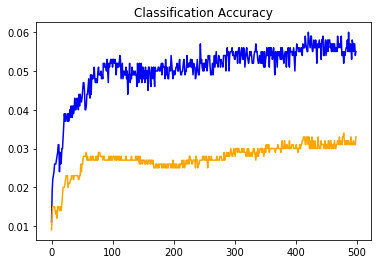

In [96]:
plotting_graph(history_CNN4)

CNN4 complete

In [97]:
#Model based on fine tuning freezing the first two layers

base_model_finetuning,layer1,layer2=model_train_CNN_finetuning()
base_model_finetuning.load_weights('./Documents')
layer1.trainable=False
layer2.trainable=False
model_CNN5=Sequential([base_model_finetuning,Dense(100,activation='softmax')])
model_CNN5.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_40 (Sequential)   (None, 10)                19666     
_________________________________________________________________
dense_69 (Dense)             (None, 100)               1100      
Total params: 20,766
Trainable params: 20,290
Non-trainable params: 476
_________________________________________________________________


In [98]:
#Training the fifth CNN model which uses fine tuning for 500 epochs

model_CNN5.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
history_CNN5=model_CNN5.fit(X_train_cifar100_r,y_train_cifar100_r, epochs=500, batch_size=10,validation_data=(X_test_cifar100_r,y_test_cifar100_r), verbose=1)

Train on 1000 samples, validate on 1000 samples
Epoch 1/500
1000/1000 [==============================] - 1s 783us/step - loss: 4.6025 - accuracy: 0.0100 - val_loss: 4.5979 - val_accuracy: 0.0110
Epoch 2/500
1000/1000 [==============================] - 0s 470us/step - loss: 4.5800 - accuracy: 0.0180 - val_loss: 4.5902 - val_accuracy: 0.0130
Epoch 3/500
1000/1000 [==============================] - 0s 479us/step - loss: 4.5595 - accuracy: 0.0180 - val_loss: 4.5889 - val_accuracy: 0.0130
Epoch 4/500
1000/1000 [==============================] - ETA: 0s - loss: 4.5409 - accuracy: 0.02 - 0s 466us/step - loss: 4.5413 - accuracy: 0.0230 - val_loss: 4.5772 - val_accuracy: 0.0210
Epoch 5/500
1000/1000 [==============================] - 0s 471us/step - loss: 4.5215 - accuracy: 0.0340 - val_loss: 4.5710 - val_accuracy: 0.0180
Epoch 6/500
1000/1000 [==============================] - 0s 461us/step - loss: 4.5045 - accuracy: 0.0310 - val_loss: 4.5678 - val_accuracy: 0.0120
Epoch 7/500
1000/1000 [=====

1000/1000 [==============================] - 0s 469us/step - loss: 3.3914 - accuracy: 0.1290 - val_loss: 5.2269 - val_accuracy: 0.0180
Epoch 111/500
1000/1000 [==============================] - 0s 466us/step - loss: 3.3740 - accuracy: 0.1290 - val_loss: 5.2337 - val_accuracy: 0.0180
Epoch 112/500
1000/1000 [==============================] - 0s 462us/step - loss: 3.3679 - accuracy: 0.1350 - val_loss: 5.2545 - val_accuracy: 0.0170
Epoch 113/500
1000/1000 [==============================] - 0s 466us/step - loss: 3.3834 - accuracy: 0.1270 - val_loss: 5.2622 - val_accuracy: 0.0210
Epoch 114/500
1000/1000 [==============================] - 0s 458us/step - loss: 3.3661 - accuracy: 0.1380 - val_loss: 5.2758 - val_accuracy: 0.0170
Epoch 115/500
1000/1000 [==============================] - 0s 464us/step - loss: 3.3591 - accuracy: 0.1340 - val_loss: 5.2747 - val_accuracy: 0.0170
Epoch 116/500
1000/1000 [==============================] - 0s 458us/step - loss: 3.3461 - accuracy: 0.1400 - val_loss: 5

1000/1000 [==============================] - 0s 460us/step - loss: 3.2097 - accuracy: 0.1520 - val_loss: 5.8510 - val_accuracy: 0.0170
Epoch 166/500
1000/1000 [==============================] - 0s 460us/step - loss: 3.1791 - accuracy: 0.1540 - val_loss: 5.8713 - val_accuracy: 0.0180
Epoch 167/500
1000/1000 [==============================] - 0s 470us/step - loss: 3.1940 - accuracy: 0.1440 - val_loss: 5.8898 - val_accuracy: 0.0170
Epoch 168/500
1000/1000 [==============================] - 0s 460us/step - loss: 3.2095 - accuracy: 0.1500 - val_loss: 5.9020 - val_accuracy: 0.0170
Epoch 169/500
1000/1000 [==============================] - 0s 474us/step - loss: 3.2008 - accuracy: 0.1520 - val_loss: 5.9296 - val_accuracy: 0.0170
Epoch 170/500
1000/1000 [==============================] - 0s 457us/step - loss: 3.2026 - accuracy: 0.1500 - val_loss: 5.9292 - val_accuracy: 0.0200
Epoch 171/500
1000/1000 [==============================] - 0s 470us/step - loss: 3.2206 - accuracy: 0.1500 - val_loss: 5

1000/1000 [==============================] - 0s 467us/step - loss: 3.0892 - accuracy: 0.1720 - val_loss: 6.4888 - val_accuracy: 0.0150
Epoch 221/500
1000/1000 [==============================] - 0s 457us/step - loss: 3.1341 - accuracy: 0.1790 - val_loss: 6.4878 - val_accuracy: 0.0150
Epoch 222/500
1000/1000 [==============================] - 0s 460us/step - loss: 3.0843 - accuracy: 0.1820 - val_loss: 6.5213 - val_accuracy: 0.0140
Epoch 223/500
1000/1000 [==============================] - 0s 465us/step - loss: 3.1363 - accuracy: 0.1820 - val_loss: 6.4764 - val_accuracy: 0.0130
Epoch 224/500
1000/1000 [==============================] - 0s 457us/step - loss: 3.1124 - accuracy: 0.1700 - val_loss: 6.5358 - val_accuracy: 0.0150
Epoch 225/500
1000/1000 [==============================] - 0s 470us/step - loss: 3.1090 - accuracy: 0.1820 - val_loss: 6.5479 - val_accuracy: 0.0170
Epoch 226/500
1000/1000 [==============================] - 0s 463us/step - loss: 3.1471 - accuracy: 0.1670 - val_loss: 6

1000/1000 [==============================] - 0s 465us/step - loss: 3.0877 - accuracy: 0.1930 - val_loss: 7.0586 - val_accuracy: 0.0150
Epoch 276/500
1000/1000 [==============================] - 0s 465us/step - loss: 3.0544 - accuracy: 0.1900 - val_loss: 7.0817 - val_accuracy: 0.0150
Epoch 277/500
1000/1000 [==============================] - 0s 467us/step - loss: 3.0144 - accuracy: 0.1990 - val_loss: 7.0754 - val_accuracy: 0.0140
Epoch 278/500
1000/1000 [==============================] - 0s 464us/step - loss: 3.0423 - accuracy: 0.1980 - val_loss: 7.0718 - val_accuracy: 0.0150
Epoch 279/500
1000/1000 [==============================] - 0s 477us/step - loss: 3.0182 - accuracy: 0.1990 - val_loss: 7.0850 - val_accuracy: 0.0140
Epoch 280/500
1000/1000 [==============================] - 0s 460us/step - loss: 3.0470 - accuracy: 0.1960 - val_loss: 7.1346 - val_accuracy: 0.0130
Epoch 281/500
1000/1000 [==============================] - 0s 464us/step - loss: 3.0346 - accuracy: 0.1960 - val_loss: 7

Epoch 330/500
1000/1000 [==============================] - 0s 466us/step - loss: 2.9327 - accuracy: 0.2180 - val_loss: 7.5762 - val_accuracy: 0.0220
Epoch 331/500
1000/1000 [==============================] - 0s 469us/step - loss: 2.9794 - accuracy: 0.2180 - val_loss: 7.6198 - val_accuracy: 0.0180
Epoch 332/500
1000/1000 [==============================] - 0s 456us/step - loss: 2.9782 - accuracy: 0.2110 - val_loss: 7.5490 - val_accuracy: 0.0210
Epoch 333/500
1000/1000 [==============================] - 0s 469us/step - loss: 2.9532 - accuracy: 0.2150 - val_loss: 7.6411 - val_accuracy: 0.0190
Epoch 334/500
1000/1000 [==============================] - 0s 466us/step - loss: 2.9766 - accuracy: 0.2100 - val_loss: 7.5864 - val_accuracy: 0.0240
Epoch 335/500
1000/1000 [==============================] - 0s 468us/step - loss: 2.9999 - accuracy: 0.2090 - val_loss: 7.6214 - val_accuracy: 0.0220
Epoch 336/500
1000/1000 [==============================] - 0s 466us/step - loss: 2.9680 - accuracy: 0.2110

Epoch 385/500
1000/1000 [==============================] - 0s 458us/step - loss: 2.9297 - accuracy: 0.2300 - val_loss: 8.0504 - val_accuracy: 0.0190
Epoch 386/500
1000/1000 [==============================] - 0s 462us/step - loss: 2.9253 - accuracy: 0.2280 - val_loss: 8.0897 - val_accuracy: 0.0220
Epoch 387/500
1000/1000 [==============================] - 0s 469us/step - loss: 2.8602 - accuracy: 0.2350 - val_loss: 7.9664 - val_accuracy: 0.0220
Epoch 388/500
1000/1000 [==============================] - 0s 462us/step - loss: 2.8785 - accuracy: 0.2470 - val_loss: 8.0808 - val_accuracy: 0.0240
Epoch 389/500
1000/1000 [==============================] - 0s 462us/step - loss: 2.8849 - accuracy: 0.2460 - val_loss: 8.0214 - val_accuracy: 0.0230
Epoch 390/500
1000/1000 [==============================] - 0s 455us/step - loss: 2.9044 - accuracy: 0.2310 - val_loss: 8.0795 - val_accuracy: 0.0190
Epoch 391/500
1000/1000 [==============================] - 0s 469us/step - loss: 2.8769 - accuracy: 0.2360

Epoch 440/500
1000/1000 [==============================] - 0s 463us/step - loss: 2.8328 - accuracy: 0.2440 - val_loss: 8.4060 - val_accuracy: 0.0200
Epoch 441/500
1000/1000 [==============================] - 0s 470us/step - loss: 2.8047 - accuracy: 0.2500 - val_loss: 8.4306 - val_accuracy: 0.0200
Epoch 442/500
1000/1000 [==============================] - 0s 462us/step - loss: 2.8447 - accuracy: 0.2400 - val_loss: 8.5594 - val_accuracy: 0.0210
Epoch 443/500
1000/1000 [==============================] - 0s 467us/step - loss: 2.8953 - accuracy: 0.2350 - val_loss: 8.4041 - val_accuracy: 0.0190
Epoch 444/500
1000/1000 [==============================] - 0s 464us/step - loss: 2.8090 - accuracy: 0.2570 - val_loss: 8.4727 - val_accuracy: 0.0140
Epoch 445/500
1000/1000 [==============================] - 0s 471us/step - loss: 2.8204 - accuracy: 0.2490 - val_loss: 8.4684 - val_accuracy: 0.0170
Epoch 446/500
1000/1000 [==============================] - 0s 486us/step - loss: 2.8297 - accuracy: 0.2440

Epoch 495/500
1000/1000 [==============================] - 0s 458us/step - loss: 2.7950 - accuracy: 0.2450 - val_loss: 8.8063 - val_accuracy: 0.0170
Epoch 496/500
1000/1000 [==============================] - 0s 456us/step - loss: 2.7627 - accuracy: 0.2480 - val_loss: 8.8305 - val_accuracy: 0.0150
Epoch 497/500
1000/1000 [==============================] - 0s 472us/step - loss: 2.7823 - accuracy: 0.2510 - val_loss: 8.8973 - val_accuracy: 0.0170
Epoch 498/500
1000/1000 [==============================] - 0s 462us/step - loss: 2.7686 - accuracy: 0.2560 - val_loss: 8.9344 - val_accuracy: 0.0180
Epoch 499/500
1000/1000 [==============================] - 0s 469us/step - loss: 2.7224 - accuracy: 0.2590 - val_loss: 8.8440 - val_accuracy: 0.0190
Epoch 500/500
1000/1000 [==============================] - 0s 457us/step - loss: 2.7517 - accuracy: 0.2420 - val_loss: 8.8878 - val_accuracy: 0.0140


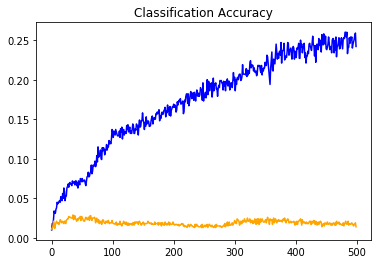

In [99]:
plotting_graph(history_CNN5)

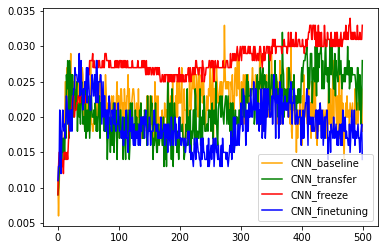

In [100]:
#Comparison of the CIFAR100 trained models includeing the baseline, transfer learning, freezing the transfer layers
#and fine tuning

plotting_verify(history_CNN2,history_CNN3,history_CNN4,history_CNN5)

As seen in the figure above, freezing the transferred layer gave better performance as compared to the other models which include baseline CNN, trasnferring the layers without freezing layers, as well as finetuning by freezing the first two layers. The reason for a better performance being the model being already pretrained on a similar datset with higher validation accuracy for more data. The reason for transferring CNN to have less accuracy could be the pretrained datasetbeing retrained for less number of samples. The fine-tuning has the least accuracy due to the learning rate not being low enough to increase the accuracy and having the lerning rate to be default. This performance could be improved by freezing more layers or decreasing the learning rate which boosts accuracy but will lower the training speed. The overall validation accuracy is less due to fact that training set is 2% of the avialable dataset as well as the validation dataset is less.  